## D208 - Predictive Modeling - PA1

### Import Libraries

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import statsmodels.api as sm
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load Data From medical_clean.csv

In [140]:
# load data file
df = pd.read_csv('/Users/Spence604/Library/CloudStorage/OneDrive-WesternGovernorsUniversity/Docs/Churn Data/churn_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


#### Start understanding data

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [142]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [143]:
df['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [144]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

### Any Rows With Nulls?

In [145]:
print("Are there any rows with nulls: " + str(df.isnull().all(axis=1).any()))

Are there any rows with nulls: False


### Any Missing Values?

In [146]:
df.loc[:, df.isnull().any()]

""
0
1
2
3
4
...
9995
9996
9997
9998


---
##  **Part 1: Research Question:**
### [A1] **Question:** "can we determine if various customer factors contribute to the reason for contacting the telecom company for tech support?" (Contacts) P:(Age, time out per week, failure, income, gb per year, 

---
### **Data Exploration**
---

#### Describe & Explore Numeric Fields:

In [147]:
#https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns
# Describe Numeric Fields
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [148]:
df_num = df.select_dtypes(include='number')
df_num.head()
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,99927,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,48661,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,97148,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,92014,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,77461,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,...,149.948316,271.493436,4,4,4,3,4,4,4,5


#### Describe & Explore Categorical Fields:

In [149]:
# Describe Categorical Fields
df.describe(include = ['O'])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6058,52,1620,3,25,639,5,...,2,2,2,2,2,2,2,2,2,4
top,Z424457,f6a1e971-607e-4178-a64f-e5c4ff7ae54a,e7a116834f1cad75933035cddc6fcb52,Houston,TX,Washington,Suburban,America/New_York,Occupational psychologist,Divorced,...,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,1,1,1,34,603,111,3346,4072,30,2092,...,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


In [150]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,Urban,America/Sitka,Environmental health practitioner,Widowed,...,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic)
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,Urban,America/Detroit,"Programmer, multimedia",Married,...,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic)
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,Urban,America/Los_Angeles,Chief Financial Officer,Widowed,...,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic)
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,Suburban,America/Los_Angeles,Solicitor,Married,...,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,Suburban,America/Chicago,Medical illustrator,Separated,...,No,No,No,No,No,Yes,Yes,No,No,Mailed Check


#### [B cont.] Create Subset Data Group to Focus On and Describe

#### Add Columns to Quantify Boolean Fields

In [151]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children','Marital', 'Churn',
        'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8','Email'], axis=1)

In [152]:
df['TechSupport'] = df['TechSupport'].map(
                   {'No':1 ,'Yes':0})
df

,Age,Income,Gender,Outage_sec_perweek,Contacts,Yearly_equip_failure,TechSupport,Bandwidth_GB_Year
0,68,28561.99,Male,7.978323,0,1,1,904.536110
1,27,21704.77,Female,11.699080,0,1,1,800.982766
2,50,9609.57,Female,10.752800,0,1,1,2054.706961
3,48,18925.23,Male,14.913540,2,0,1,2164.579412
4,83,40074.19,Male,8.147417,2,1,0,271.493436
...,...,...,...,...,...,...,...,...
9995,23,55723.74,Male,9.415935,2,0,1,6511.252601
9996,48,34129.34,Male,6.740547,2,0,1,5695.951810
9997,48,45983.43,Female,6.590911,0,0,1,4159.305799
9998,39,16667.58,Male,12.071910,1,0,0,6468.456752


In [122]:
df.head()

,Age,Income,Gender,Outage_sec_perweek,Contacts,Yearly_equip_failure,TechSupport,Bandwidth_GB_Year
0,68,28561.99,Male,7.978323,0,1,1,904.536110
1,27,21704.77,Female,11.699080,0,1,1,800.982766
2,50,9609.57,Female,10.752800,0,1,1,2054.706961
3,48,18925.23,Male,14.913540,2,0,1,2164.579412
4,83,40074.19,Male,8.147417,2,1,0,271.493436


In [153]:
df['Gender'] = df['Gender'].map(
                   {'Female':1 ,'Male':2, 'Nonbinary':3})
df

,Age,Income,Gender,Outage_sec_perweek,Contacts,Yearly_equip_failure,TechSupport,Bandwidth_GB_Year
0,68,28561.99,2,7.978323,0,1,1,904.536110
1,27,21704.77,1,11.699080,0,1,1,800.982766
2,50,9609.57,1,10.752800,0,1,1,2054.706961
3,48,18925.23,2,14.913540,2,0,1,2164.579412
4,83,40074.19,2,8.147417,2,1,0,271.493436
...,...,...,...,...,...,...,...,...
9995,23,55723.74,2,9.415935,2,0,1,6511.252601
9996,48,34129.34,2,6.740547,2,0,1,5695.951810
9997,48,45983.43,1,6.590911,0,0,1,4159.305799
9998,39,16667.58,2,12.071910,1,0,0,6468.456752


In [154]:
df.to_csv('D208 P1 Initial.csv')

In [47]:
df['Gender'].value_counts()

1    5025
2    4744
3     231
Name: Gender, dtype: int64

#### Plot Data

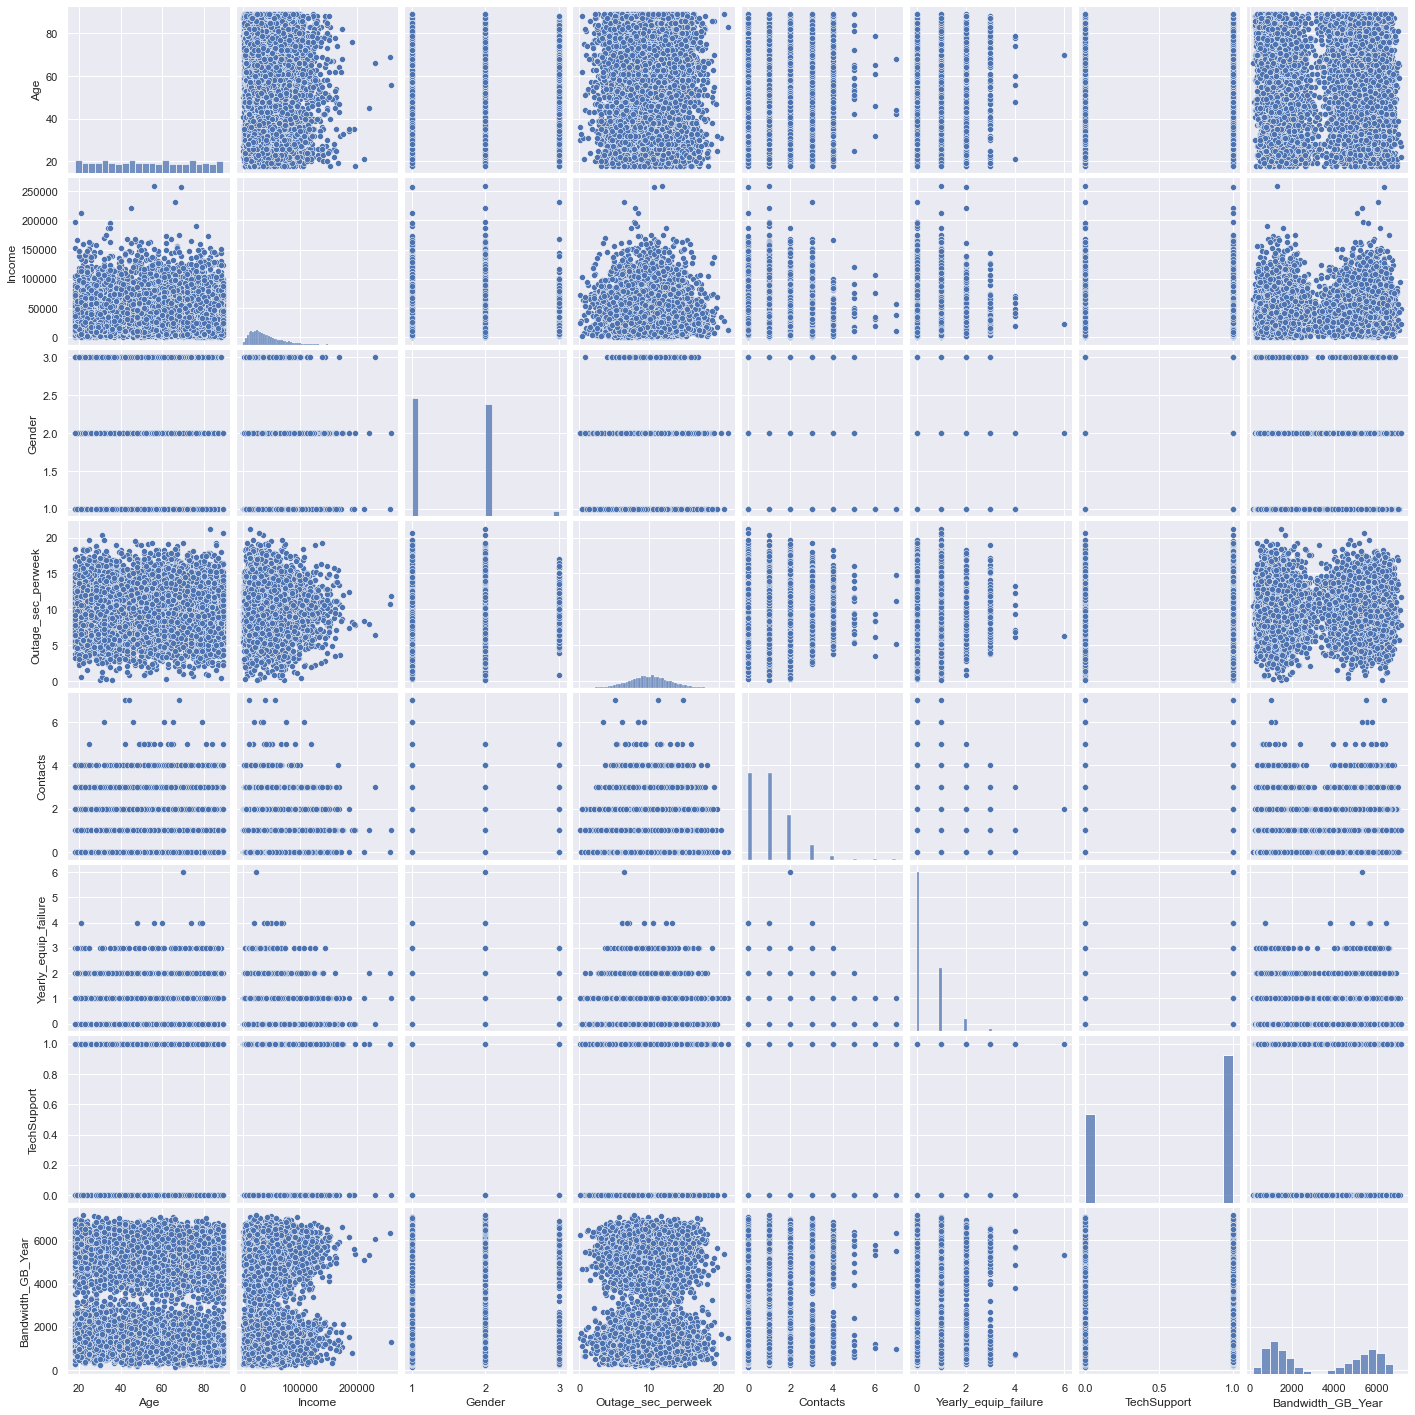

In [124]:
sns.pairplot(df);
plt.savefig('output')

### Univariate Analysis

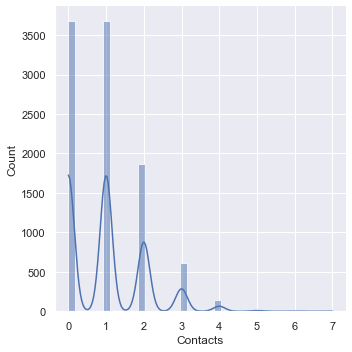

In [50]:
# https://seaborn.pydata.org/generated/seaborn.displot.html
# Distribution of Total Charge
sns.displot(data=df, 
            x='Contacts', 
            kde=True);
plt.savefig('output')

In [21]:
df.columns

Index(['Age', 'Income', 'Gender', 'Outage_sec_perweek', 'Contacts',
       'Yearly_equip_failure', 'TechSupport', 'Bandwidth_GB_Year'],
      dtype='object')

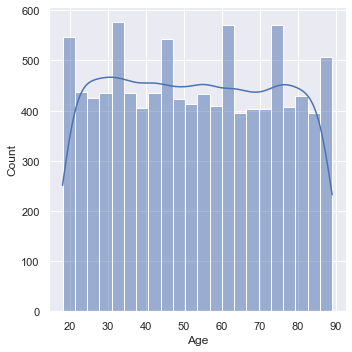

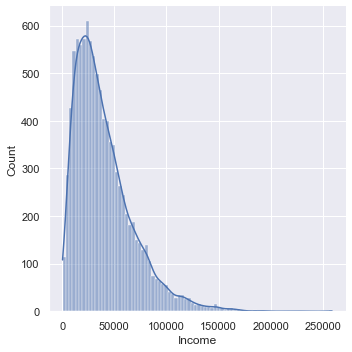

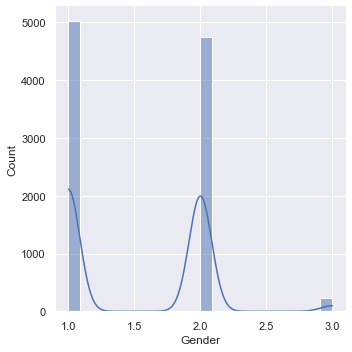

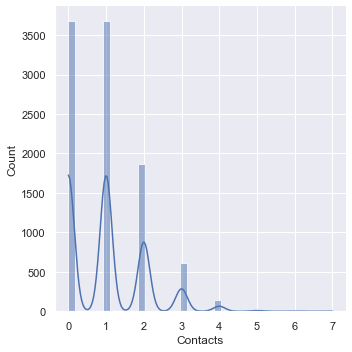

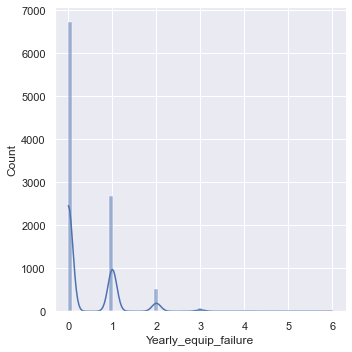

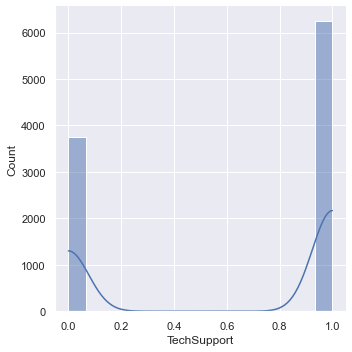

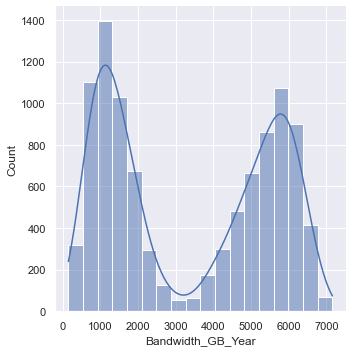

In [51]:
sns.displot(data=df, 
            x='Age', 
            kde=True);
plt.savefig('output64')

sns.displot(data=df, 
            x='Income', 
            kde=True);
plt.savefig('output7')

sns.displot(data=df, 
            x='Gender', 
            kde=True);
plt.savefig('output5')

sns.displot(data=df, 
            x='Contacts', 
            kde=True);
plt.savefig('output4')

sns.displot(data=df, 
            x='Yearly_equip_failure', 
            kde=True);
plt.savefig('output3')

sns.displot(data=df, 
            x='TechSupport', 
            kde=True);
plt.savefig('output2')

sns.displot(data=df, 
            x='Bandwidth_GB_Year', 
            kde=True);
plt.savefig('output1')

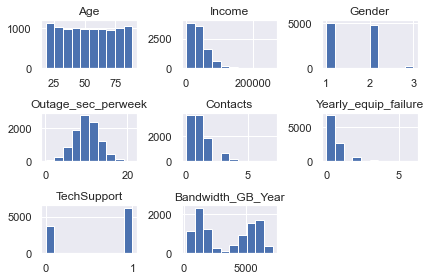

In [52]:
df[['Age', 'Income', 'Gender', 'Outage_sec_perweek', 'Contacts',
       'Yearly_equip_failure', 'TechSupport', 'Bandwidth_GB_Year']].hist()
plt.savefig('pyplot univ.jpg')
plt.tight_layout()

In [53]:
df.columns

Index(['Age', 'Income', 'Gender', 'Outage_sec_perweek', 'Contacts',
       'Yearly_equip_failure', 'TechSupport', 'Bandwidth_GB_Year'],
      dtype='object')

#### Bivariate Analysis

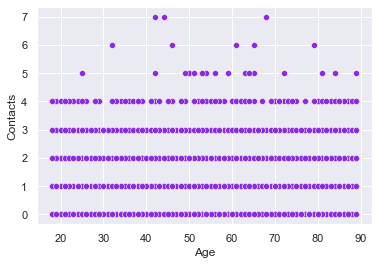

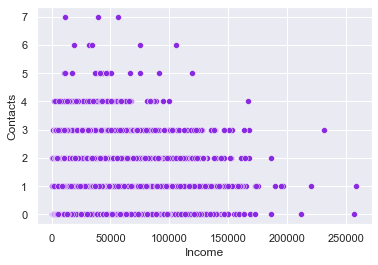

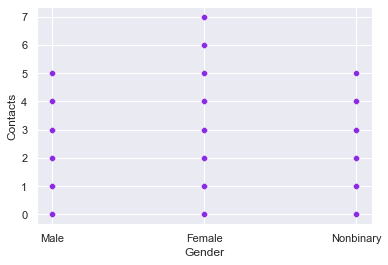

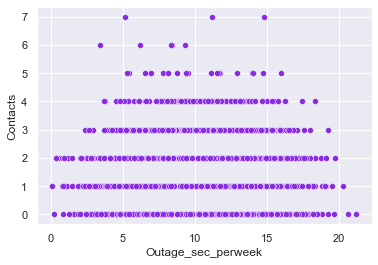

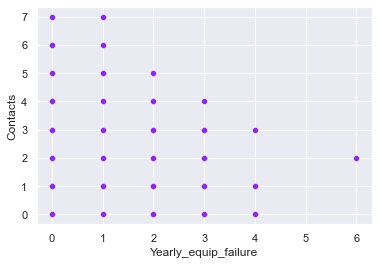

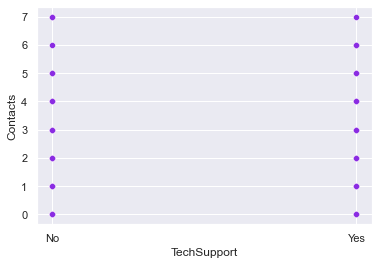

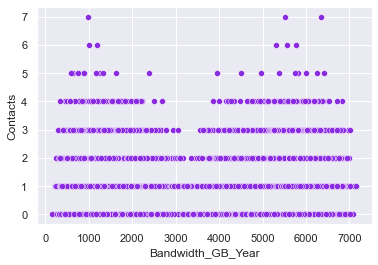

In [106]:
sns.scatterplot(x=df['Age'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv3223433')
plt.show();

sns.scatterplot(x=df['Income'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv333233')
plt.show();

sns.scatterplot(x=df['Gender'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv3333333')
plt.show();

sns.scatterplot(x=df['Outage_sec_perweek'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv33')
plt.show();


sns.scatterplot(x=df['Yearly_equip_failure'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv3')
plt.show();


sns.scatterplot(x=df['TechSupport'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv2')
plt.show();


sns.scatterplot(x=df['Bandwidth_GB_Year'], y=df['Contacts'], color='blueviolet')
plt.savefig('biv1')
plt.show();


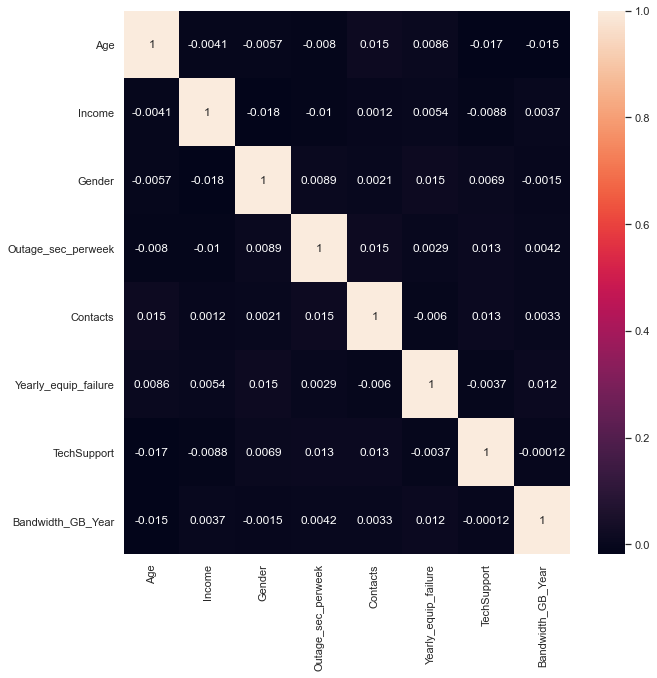

In [125]:
# Trying to make sense of numerical values, discover possible correlations
# Ref1: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
# Ref2: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot=True);

## Regression Model w/Most Terms - Compare to p-value

In [126]:
# 90% Train, 10% Test
X = df.drop(['Contacts'], axis=1)  

y = df['Contacts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [128]:
# Look into Stats Models w/p values
X_train2 = sm.add_constant(X_train)

model = sm.OLS(y_train,X_train2)

print(model.fit().summary())

p_vals = dict(model.fit().pvalues[1:])

df

                            OLS Regression Results                            
Dep. Variable:               Contacts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.002
Date:                Sun, 27 Nov 2022   Prob (F-statistic):              0.428
Time:                        18:16:27   Log-Likelihood:                -9827.5
No. Observations:                7000   AIC:                         1.967e+04
Df Residuals:                    6992   BIC:                         1.973e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8865 

,Age,Income,Gender,Outage_sec_perweek,Contacts,Yearly_equip_failure,TechSupport,Bandwidth_GB_Year
0,68,28561.99,2,7.978323,0,1,1,904.536110
1,27,21704.77,1,11.699080,0,1,1,800.982766
2,50,9609.57,1,10.752800,0,1,1,2054.706961
3,48,18925.23,2,14.913540,2,0,1,2164.579412
4,83,40074.19,2,8.147417,2,1,0,271.493436
...,...,...,...,...,...,...,...,...
9995,23,55723.74,2,9.415935,2,0,1,6511.252601
9996,48,34129.34,2,6.740547,2,0,1,5695.951810
9997,48,45983.43,1,6.590911,0,0,1,4159.305799
9998,39,16667.58,2,12.071910,1,0,0,6468.456752


#### Prune Based On P-Value and Hypothesis Question

In [136]:
# list comprehension --> Verify Fields < 0.2 p-value
[key for key in p_vals.keys() if p_vals[key] < 0.3]

['Age', 'Income', 'Outage_sec_perweek', 'Bandwidth_GB_Year']

In [130]:
df = df.drop(['Gender', 'Yearly_equip_failure', 'TechSupport'], axis=1)
df.columns

Index(['Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Bandwidth_GB_Year'], dtype='object')

In [132]:
df.to_csv('D208 P1 Reduced.csv')

In [131]:
df.head()

,Age,Income,Outage_sec_perweek,Contacts,Bandwidth_GB_Year
0,68,28561.99,7.978323,0,904.536110
1,27,21704.77,11.699080,0,800.982766
2,50,9609.57,10.752800,0,2054.706961
3,48,18925.23,14.913540,2,2164.579412
4,83,40074.19,8.147417,2,271.493436


#### Multiple Regression Model Run Again

In [133]:
# 90% Train, 10% Test
X = df.drop(['Contacts'], axis=1)
# USE Hypothesis Predictors
X = df[['Age', 'Income', 'Outage_sec_perweek', 'Bandwidth_GB_Year']]

y = df['Contacts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [134]:
# Look into Stats Models w/p values
X_train2 = sm.add_constant(X_train)

model02 = sm.OLS(y_train,X_train2)

print(model02.fit().summary())

p_vals = dict(model02.fit().pvalues[1:])

                            OLS Regression Results                            
Dep. Variable:               Contacts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.543
Date:                Sun, 27 Nov 2022   Prob (F-statistic):              0.187
Time:                        18:33:55   Log-Likelihood:                -9827.9
No. Observations:                7000   AIC:                         1.967e+04
Df Residuals:                    6995   BIC:                         1.970e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8672      0

In [78]:
# list comprehension --> Verify Fields < 0.05 p-value
[key for key in p_vals.keys() if p_vals[key] < 0.3]

['Age', 'Income', 'Outage_sec_perweek', 'Bandwidth_GB_Year']

---
### **Part IV: Model Comparison and Analysis**
---

#### Train | Test | Split

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split

In [182]:
df.columns

Index(['Age', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Diabetes_Num', 'ReAdmis_Num'],
      dtype='object')

In [80]:
X = df.drop('Contacts', axis=1) # Everything 'but'
y = df['Contacts']

In [81]:
# 90% Train, 10% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [82]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [83]:
print(lm.intercept_)

0.8672449489954535


In [84]:
# List coefficients relating to each feature in our dataset
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Age,6.844925e-04
Income,5.934153e-07
Outage_sec_perweek,4.456088e-03
Bandwidth_GB_Year,6.738727e-06


In [85]:
lm.coef_

array([6.84492537e-04, 5.93415289e-07, 4.45608787e-03, 6.73872714e-06])

In [86]:
# Each coeficients from X_train above
X_train.columns

Index(['Age', 'Income', 'Outage_sec_perweek', 'Bandwidth_GB_Year'], dtype='object')

## Model Predictions

In [87]:
predictions = lm.predict(X_test)
predictions

array([0.98978586, 0.95952851, 1.04945265, ..., 1.01680958, 0.98945231,
       0.98162223])

In [88]:
# Measure of fit
lm.score(X_test, y_test)

-0.001706069171367286

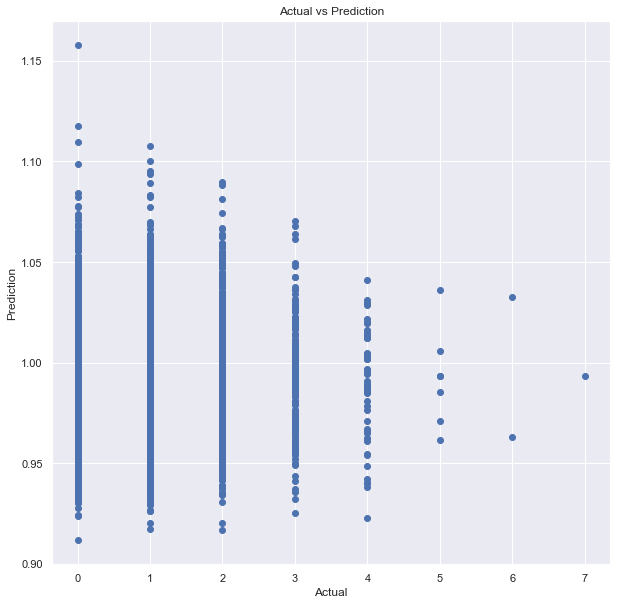

In [89]:
plt.scatter(y_test, predictions);
plt.title("Actual vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Prediction");

## Regression Evaluation Metrics

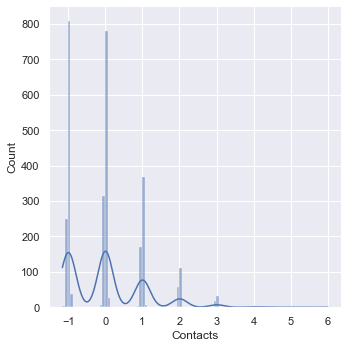

In [90]:
sns.displot(data=(y_test-predictions), bins=100, kde=True);

In [91]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7346414355983919
MSE: 0.9916444882099128
RMSE: 0.9958134806327502


In [137]:
# contact average
df['Contacts'].mean()

0.9942

In [138]:
# R squared
print('R Squared:', metrics.r2_score(y_test, predictions))

R Squared: -0.001706069171367286
